In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats


# Analisis del Dataset Titanic
****

El fin de este documento es el de crear un algoritmo de aprendizaje automatica, que nos ayude a evaluar si una persona sobrevivio, con base en el puesto que tuvo en el barco y otros factores.

**Algoritmo escogido**

Dado la naturaleza del problema, escogeremos un algoritmo que nos permita desenvolvernos en terminos Categoricos, es decir, estamos hablando de algoritmos logisticos ya vien sea un regresion logistica o una arbol de decision Categorico

<table>
  <tr>
    <td>Categoria</td>
    <td>Descripcion</td>
  </tr>
  <tr>
    <td>PassengerId</td>
    <td>Es el id de los pasajeros</td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>Es el valor categorico si sobrevivio o no el pasajero</td>
  </tr>
  <tr>
    <td>PClass</td>
    <td>La clase social del pasajero</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Nombre del pasajero</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Es el genero del pasajero</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Es la edad del pasajero</td>
  </tr>
  <tr>
    <td>SibPb</td>
    <td>Numero de compañantes (pareja o hermanos/a)</td>
  </tr>
  <tr>
    <td>Parch</td>
    <td>Numero de Hijos/ padres</td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>Es el Valor del tiquete del pasajero</td>
  </tr>
  <tr>
    <td>Tarifa</td>
    <td>Es el costo del boleto</td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>Es la Cabina del pasajero</td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>Identificador de la zona de embarcacion existente</td>
  </tr>
</tabl

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Analisis EDA
****
Ahora procederemos ha transformar los datos basicos, arreglando problemas como : los datos nulos, datos atipicos entre otros.

### Datos NULOS
****

#### Identificacion de datos Nulos

Text(0, 0.5, 'Columnas')

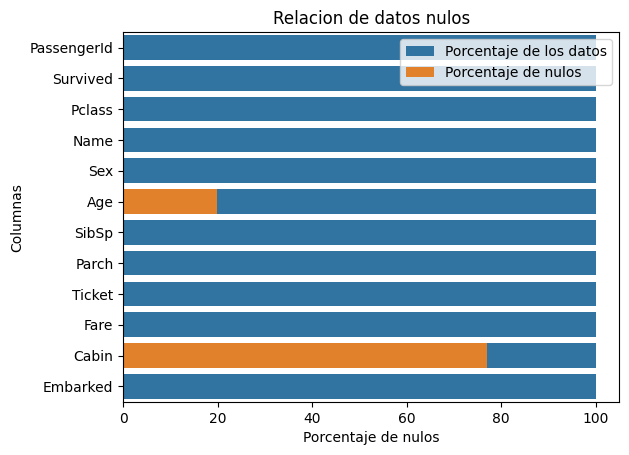

In [3]:
cant_nulos=dict(data.isnull().sum())
porcentaje_nulos = [(x/len(data))*100 for x in list(cant_nulos.values())]

#Mostrar grafica
sns.barplot(y=list(cant_nulos.keys()),x=[100 for x in data.columns],label="Porcentaje de los datos")
sns.barplot(y=list(cant_nulos.keys()),x=porcentaje_nulos,label='Porcentaje de nulos')

# Textos
plt.title("Relacion de datos nulos")
plt.xlabel("Porcentaje de nulos")
plt.ylabel("Columnas")



**Conclusion del analisis**

Para este caso tenemos dos columnas, _Age_ y _Cabin_ donde para el caso de _Age_ podriamos agregar la media, pero nuestro principal problema es que hacer con la columna de _Cabin_, esto porque no podemos implementar una media, dado que los nulos representan un **77%** y hacer esto dañaria la relacion de los datos, entonces tocaria un medio de imputacion.

Sin embargo, antes de hacer algo quiero evaluar las relaciones de los datos con nuestra columna objetivo **Survived**; para ello cojeremos los datos que no contienen nulos y evaluaremos la relacion entre las columnas

**Analisis de Relacion en tre la columna _Cabin_ y la columna _Surivived_**
****

Para evaluar la relacion existenten entre datos usaremos la prueba de **chi2** y **chi2 de fisher** donde ambos se compararan con una hipotesis nula **H0** la cual vale el 5% y determina una relacion nula, en caso de que el **chi2** y el **chi2 de fisher** sea mayor que 5%, se dara por ententido que existe alguna relacion entre las variables categoricas.

En caso de que exista una relacion, interpretaremos dicha relacion bajo la metrica de **Carmers V** el cual nos dira el valor de dicha relacion entre un rango de 0 y 1.




In [4]:
def Relacion_Categorico_categorico(data,col_x,col_y,porcentaje_size=0.1):
    muestra=data[data[col_x].isnull() != True][[col_x,col_y]]
    muestra = muestra.iloc[:round(len(muestra)*porcentaje_size)]
    tabla_contingencia = pd.crosstab(muestra[col_x],muestra[col_y])


    chi2,p_valor,_,_ = chi2_contingency(tabla_contingencia)
    chi2,f_valor,_,_ = chi2_contingency(tabla_contingencia,'Fisher')

    print(f"Relacion entre la columna {col_x} y la columna {col_y}")
    print("----------------------------------------------------------------")
    print(f"Tamaño de la muestra: {len(muestra)}")
    
    plt.figure(figsize=(15,8))
    sns.heatmap(tabla_contingencia,annot=True)
    plt.show()
    if p_valor <0.05 or f_valor <0.05:
        cramers_v=np.sqrt(chi2/(tabla_contingencia.sum().sum() * (min(tabla_contingencia.shape)-1)))
        print(f" Valor de la relacion:{round(cramers_v*100)}%")

        # Retrnar el valor de la relacion 
        return cramers_v
        
    else:
        print("No existe relacion")
        return None



Relacion entre la columna Cabin y la columna Survived
----------------------------------------------------------------
Tamaño de la muestra: 202


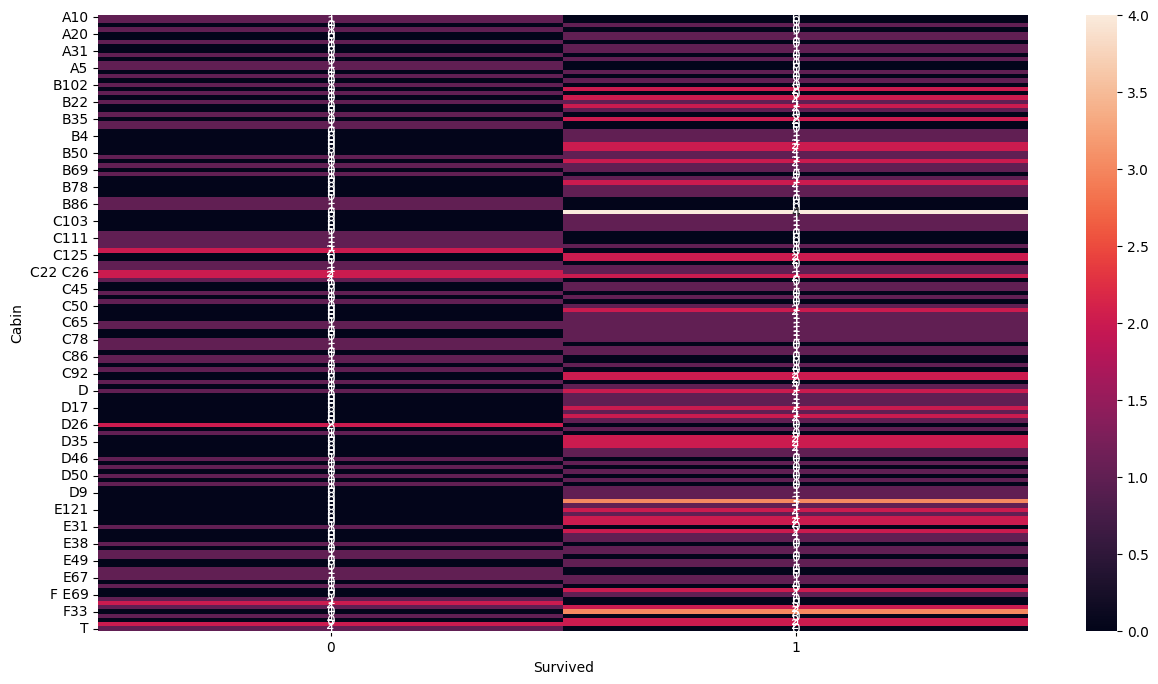

No existe relacion


In [5]:
Relacion_Categorico_categorico(data,'Cabin','Survived',0.99)


Relacion entre la columna Sex y la columna Survived
----------------------------------------------------------------
Tamaño de la muestra: 882


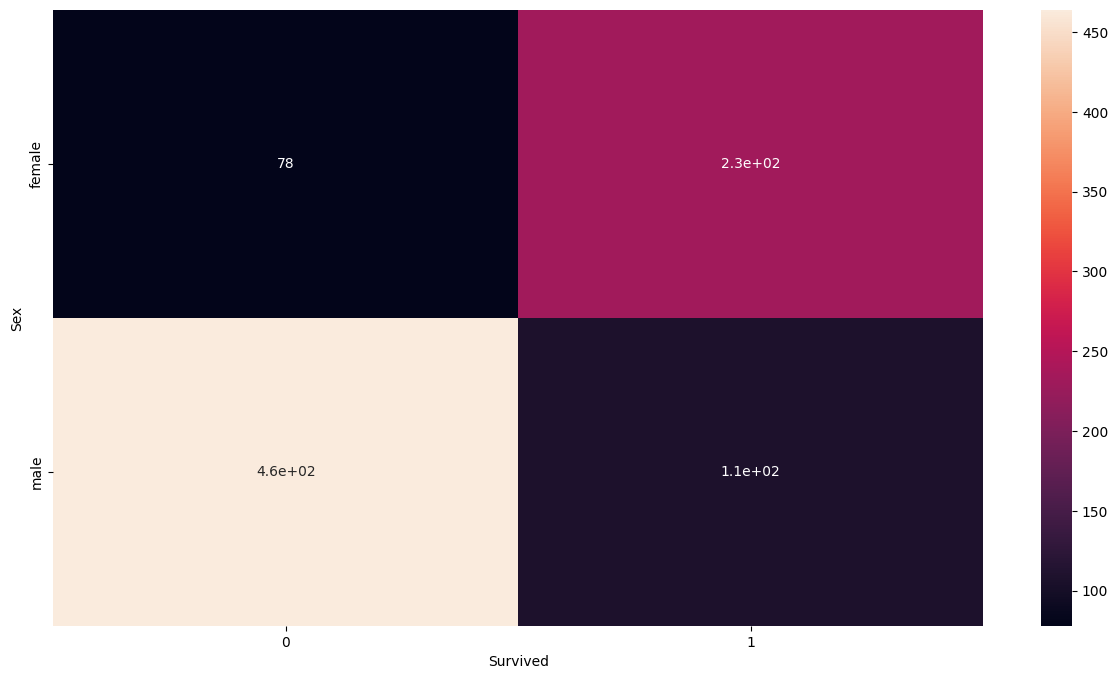

 Valor de la relacion:55%


0.5464673867083889

In [6]:
Relacion_Categorico_categorico(data,'Sex','Survived',0.99)


Como conclusion encontramos que no existe ninguna relacion entre la columna de **Survived** y la columna **Cabin**, lo que  nos resume en que podemos eliminar la columna.

In [7]:
data=data.drop(columns='Cabin',axis=1,index=0) # eliminar la columna de Cabin

data['Age'].fillna(data['Age'].mean(),inplace=True) #Modificar los datos con la media en la columna Age
data= data.dropna() #eliminar las filas nulas en la columna de Embarked

data.isnull().sum()


C:\Users\Carlos\AppData\Local\Temp\ipykernel_29312\2952426172.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True) #Modificar los datos con la media en la columna Age


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Datos atipicos
****
Ahora detectaremos aquellos datos que esten por fuera de lo comun, ya sean valores muy bajos o valores muy altos, para ello usaremos una grafica de campana de gauss y un boxplot para ver la existencia de estos datos nulos; a su vez tambien usaremos el valor de asimetria para saber la orientacion de estos datos atipicos

**Explicacion**

* Si en el proceso de asimetria el valor es Asimetria =0 quiere decir que no existe valores atipicos
* Si en el proceso de asimetria el valor de Asimetria  <0 , quiere decir que es una Curva asimetrica negativa lo que nos dice que los datos atipicos son menor que la media 

* Si en el proceso de asimetria el valor de Asimetria es > 0 quiere decir que es una simetria positiva, lo que significa que los valores atipicos son mayores que la media 

In [8]:
data['Sex'].dtype =='O'


True

In [9]:
def Extraccion_Asimetria(dt):
    tipo_asimetria ='iguales'
    #Extraer los valores de asimetria 
    for x in dt.columns:
        #Detectar si es un object 
        if dt[x].dtype !='O':
        
            #Evaluar la asimetria
            asimetria = dt[x].skew()
            
            #determinar el tipo de asimetria
            if asimetria< 0:
                tipo_asimetria ='menores'
            elif asimetria >1:
                tipo_asimetria ='mayores'
            #mostrar resultado
            print(f"\n\nAnalsis de simetria de la columna {x}")
            print("--------------------------------------")
            print(f"Valor de asimetria: {asimetria} \t Tipo de asimetria: Atipicos {tipo_asimetria} que la media")

Extraccion_Asimetria(data)




Analsis de simetria de la columna PassengerId
--------------------------------------
Valor de asimetria: 1.6357428530258383e-05 	 Tipo de asimetria: Atipicos iguales que la media


Analsis de simetria de la columna Survived
--------------------------------------
Valor de asimetria: 0.4826898517174678 	 Tipo de asimetria: Atipicos iguales que la media


Analsis de simetria de la columna Pclass
--------------------------------------
Valor de asimetria: -0.635215086530187 	 Tipo de asimetria: Atipicos menores que la media


Analsis de simetria de la columna Age
--------------------------------------
Valor de asimetria: 0.4294673860246138 	 Tipo de asimetria: Atipicos menores que la media


Analsis de simetria de la columna SibSp
--------------------------------------
Valor de asimetria: 3.6915165041640248 	 Tipo de asimetria: Atipicos mayores que la media


Analsis de simetria de la columna Parch
--------------------------------------
Valor de asimetria: 2.743179737893299 	 Tipo de asim

In [10]:
def atipicos_hist_box(dataset,list_atipicos:list):
    fig,ax=plt.subplots(len(list_atipicos),2,figsize=(30,20))

    # Mostrar datos
    for x in range(len(list_atipicos)):
        #Exatraccion de asimetria
        asimetira = dataset[list_atipicos[x]].skew()
        # Grafica de campana de gauss
        sns.histplot(dataset,x=list_atipicos[x],kde=True,ax=ax[x,0],legend="DSAd")
        # Grafica del boxplor
        sns.boxplot(dataset,x=list_atipicos[x],ax=ax[x,1])
        plt.subplots_adjust(hspace=0.5)  # Ajusta el espaciado vertical

        # agregar un titulo
        ax[x,0].set_title("analisis columna "+list_atipicos[x],fontsize=20,fontweight='bold')
        ax[x,1].set_title(f"Valor de Asiemtria: {asimetira:.2f}",fontsize=20)



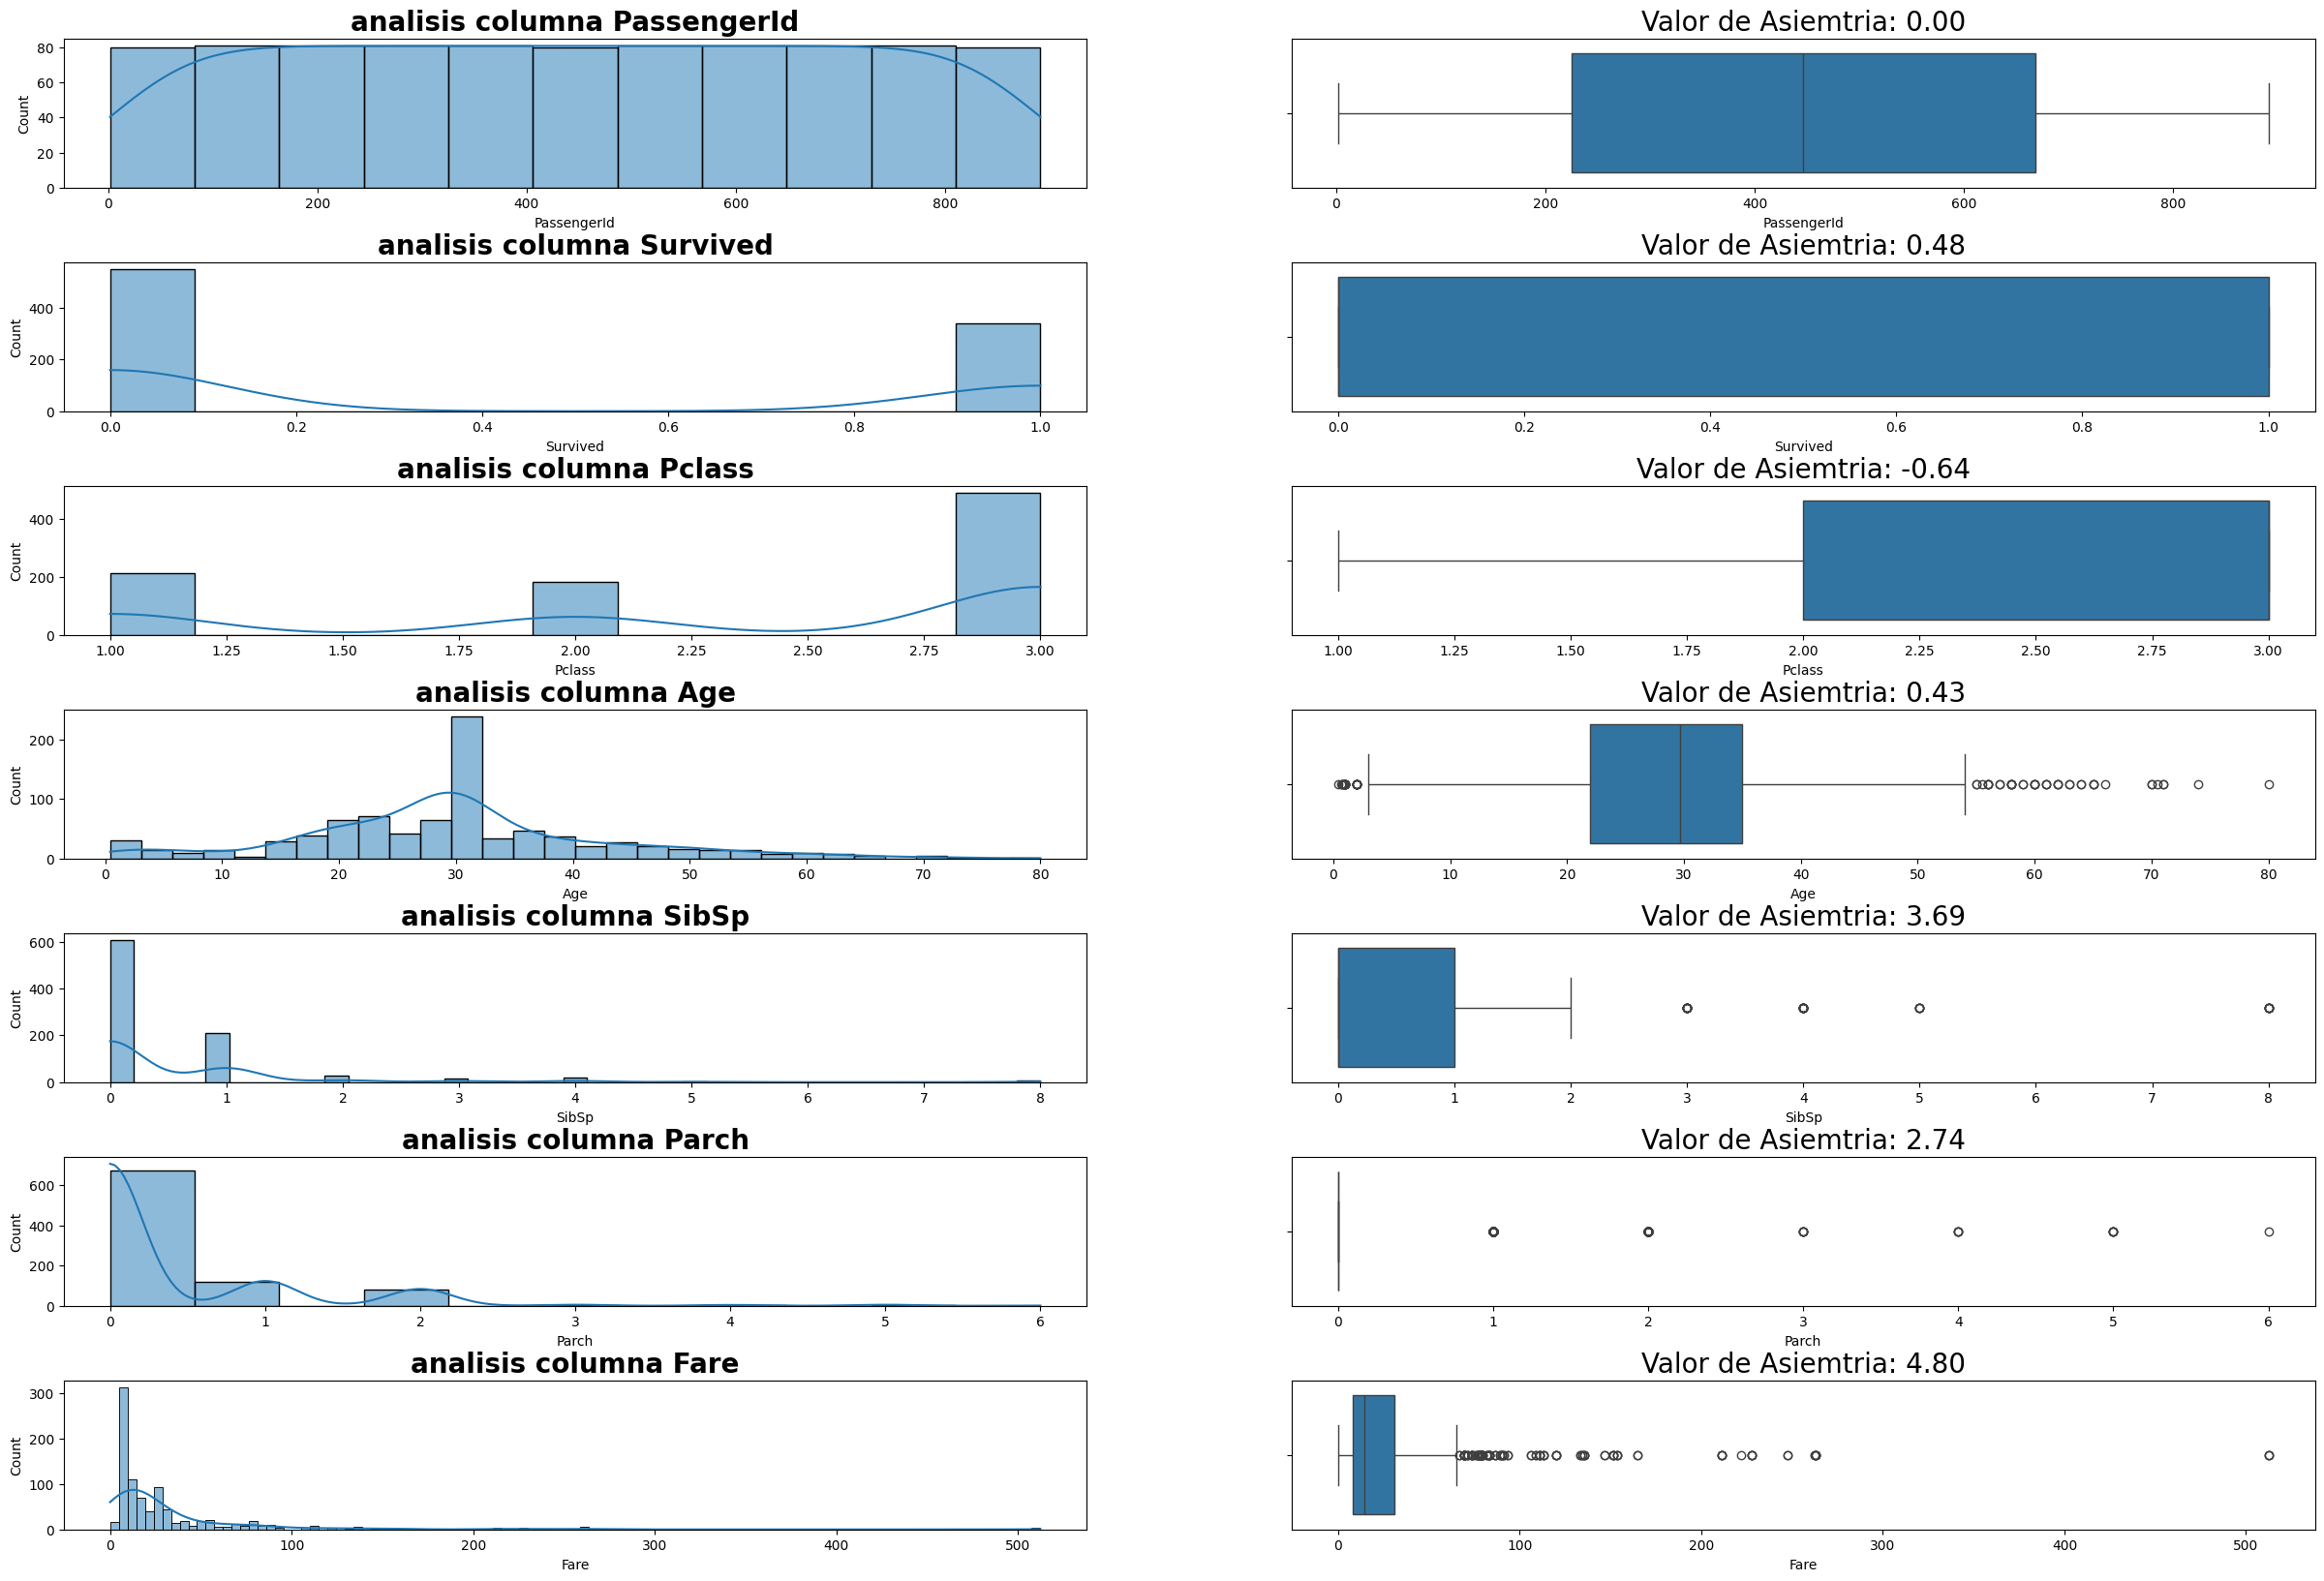

In [11]:
columnas_numericas = [ x for x in data.columns if data[x].dtype !='O']
columnas_numericas

atipicos_hist_box(data,columnas_numericas)


In [12]:

#evaluacion de datos de perdida
limites =[100,3,3,1]
sum(list(map(lambda col,limit: len(data[data[col] > limit])/len(data),['Fare','SibSp','Parch'],limites)))





0.10472972972972973

In [13]:
len(data)*sum(list(map(lambda col,limit: len(data[data[col] > limit])/len(data),['Fare','SibSp','Parch'],limites)))


93.0

Como conclusion encontramos dos cosas, la primera que las columnas de _Fare_, _SibSp_ y _Parch_ son columnas con datos atipicos mayores a la media, donde encontramos cono segunda conclusion que si elminaramos los datos atipicos tedriamos como mucho una perdiad de **12%** equivalente a 106 datos.

In [14]:
data=data[data['SibSp'] < 3]
data=data[data['Fare'] < 100]
data=data[data['Parch'] < 3]
data=data[data['Age'] > 1]

len(data)


767

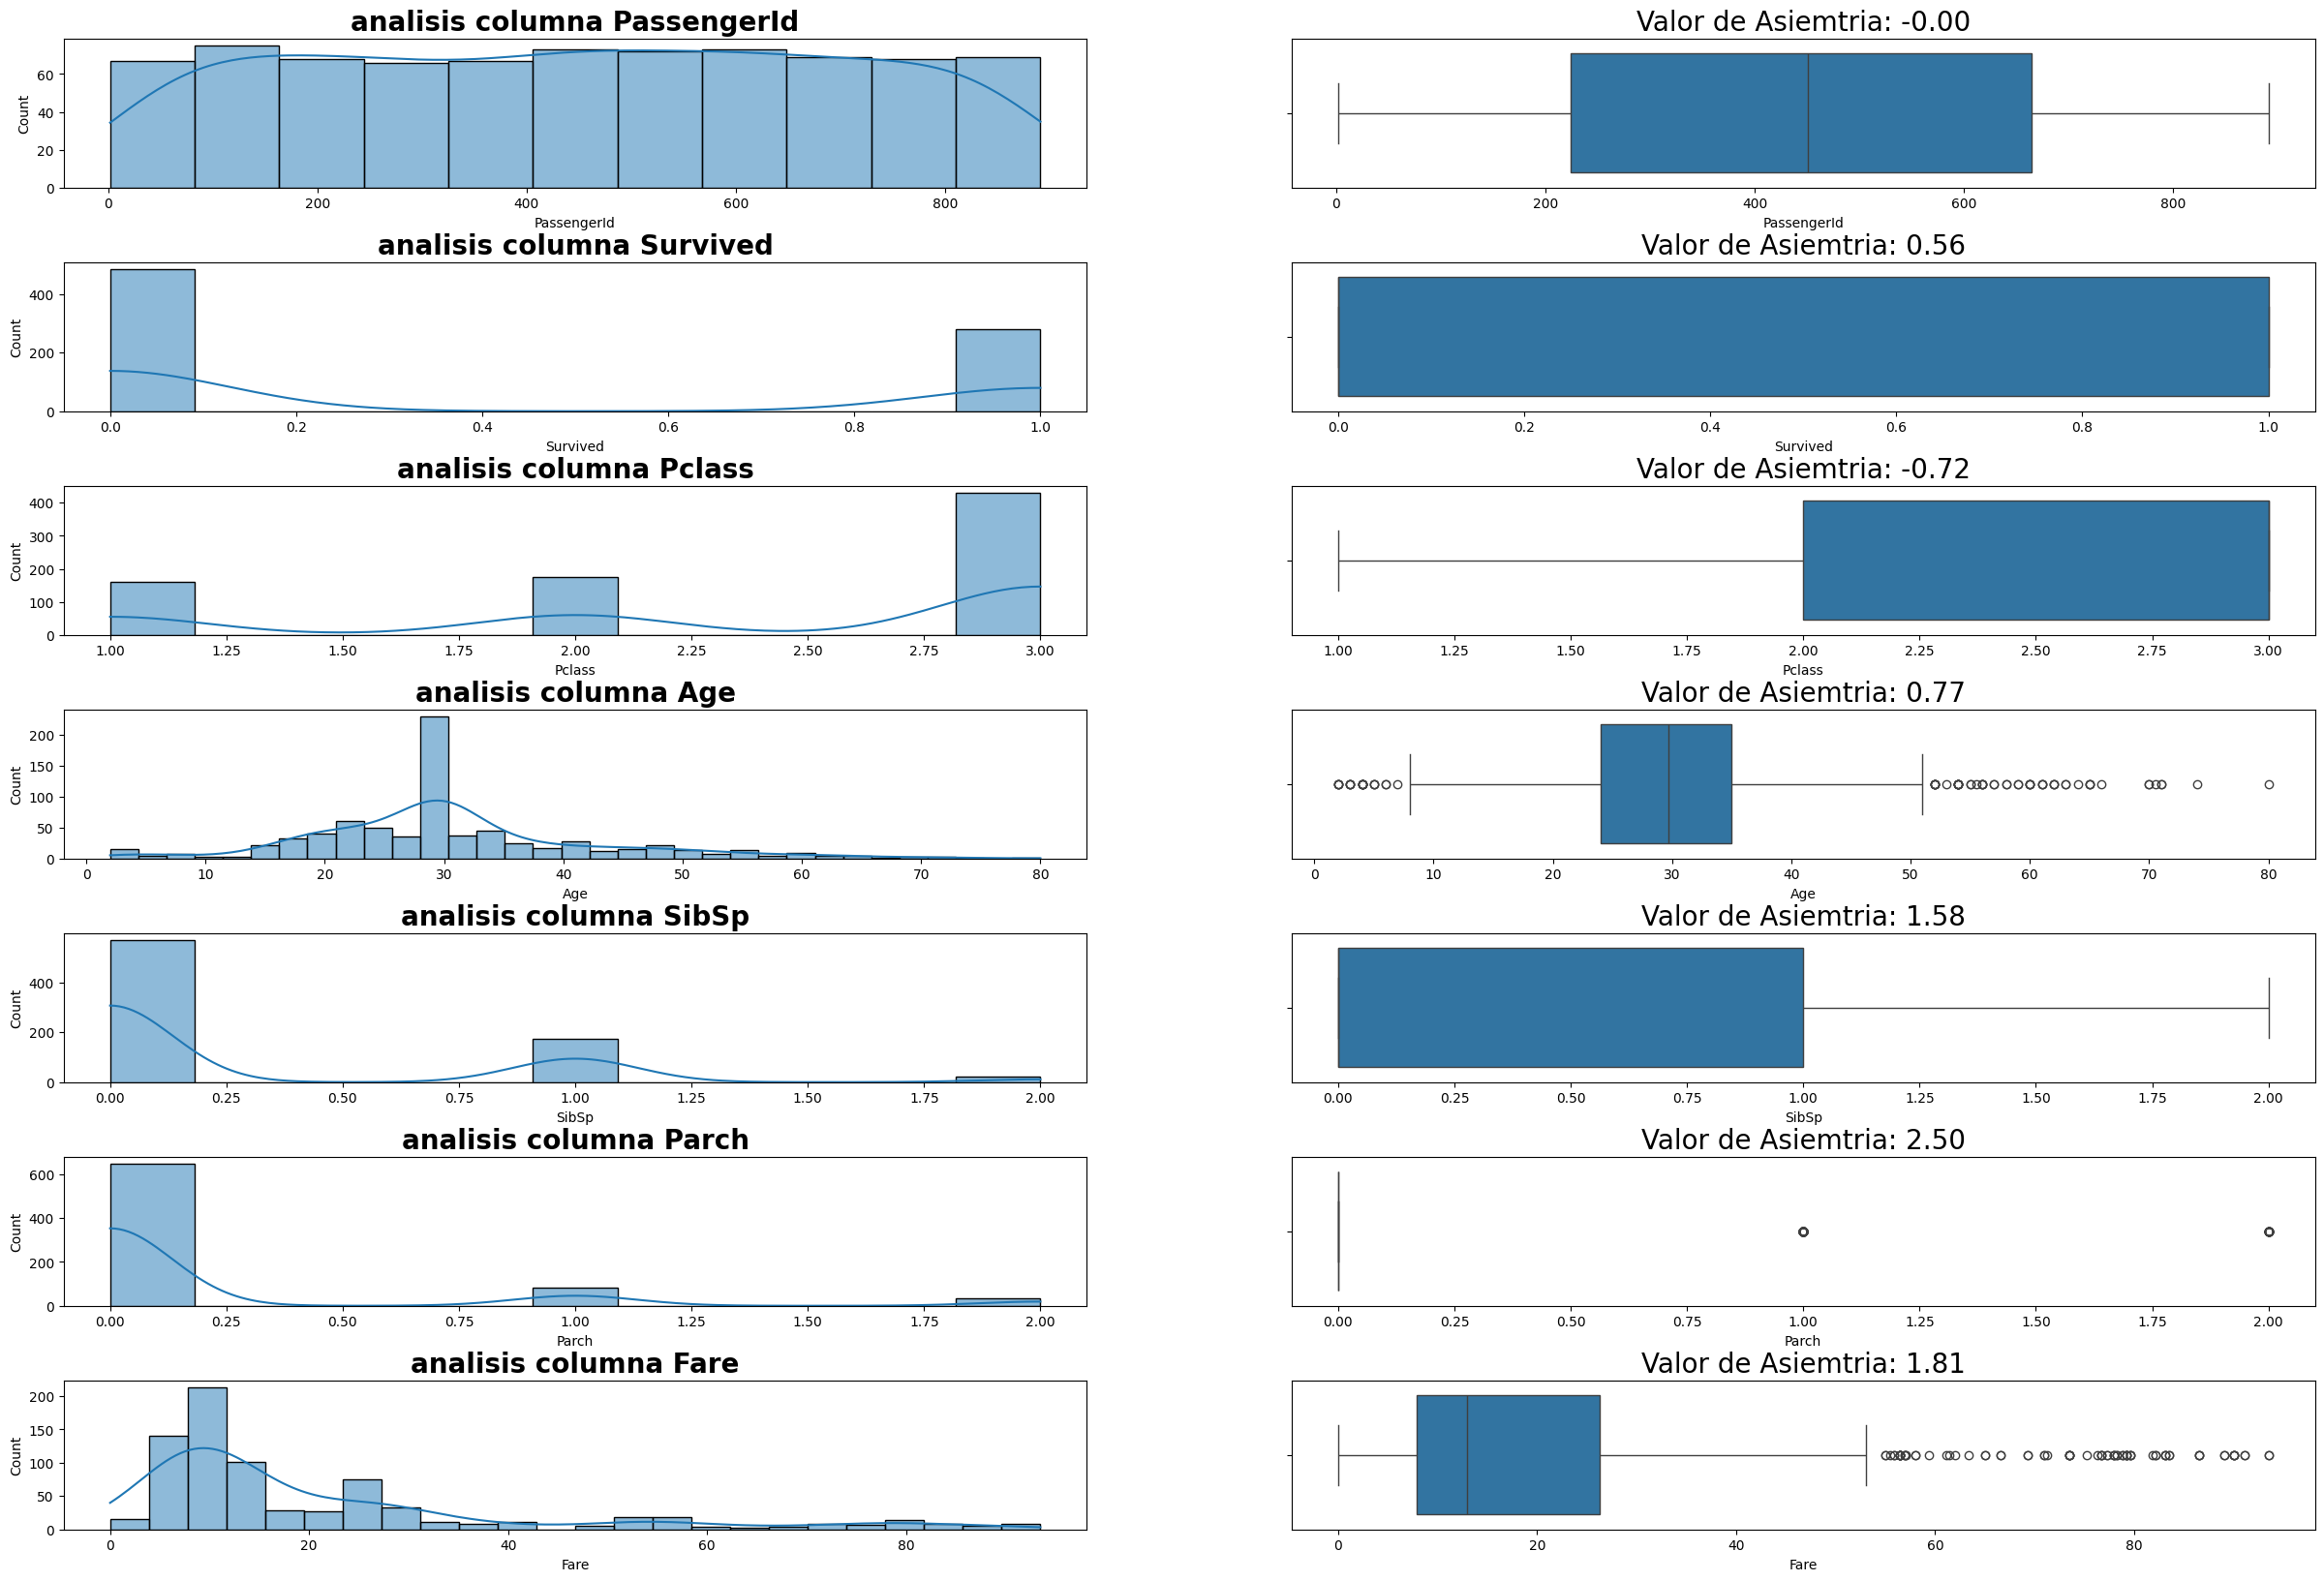

In [15]:
atipicos_hist_box(data,columnas_numericas)


Ahora vemos que bajamos el valor de los valores atipicos, podriamos seguir bajandolos, pero eso implicaria una perdidad de datos mayor, sin embargo, si aplicasemos la media a los datos atipicos estatiamos influyendo en la relacion exitenten entre los datos; es por ello que lo mejor sera dejarlo asi  

## Analisis univariante
*** 
Ahora anlizaremos las propiedades de cada columna existente en la tabla,analizaremos cosas como, su media, promedio y desviacion estandar, esto nos dira el como de variables es la columna en si y como se estima su evolucion.

***Nota:***
Cabe aclarar que la columna de _PassengerId_ y la columna _name_ son columnas unicamente informativas por ello decidiremos eliminarla. 

In [16]:
data.drop(columns=['Name',"PassengerId"],inplace=True)


### Categorizacion de las columnas
****
Con el fin de acelerar este analisis dividiremos las columnas en dos grupos Categoricos y nominales. Donde analizaremos las columnas categoricas mediante una grafica Pie, dado que esta nos mostrara el valor porcentual de cada categoria; por otro lado, analizaremos las columnas nominales mediante una grafica de histograma, dado que esta nos mostrara la tendincia de los datos.

Para determinar el tipo de grupo de la columna lo haremos bajo dos simples preguntas, las cuales son 
1. _¿Es de tipo **str**?_
2. _¿Tiene menos de 8 categorias?_

En el caso de cumplir por lo menos una de las preguntas se tomara la columna como Categorico, y en caso contrario se tomara la columna como Nominal

In [17]:
def Determinar_grupo(dt,num_minio=8):
    
    
    #Variables
    categoricos = []
    nominales =[]

    for columna in dt.columns:
        es_categorico = False
        #determinar primera pregunta
        if dt[columna].dtype == 'O':
            es_categorico = True
        
        #determinar segunda pregunta
        if len(dt[columna].unique()) <=num_minio:
            es_categorico = True
        
        #crear eldelimitador de grupo
        if es_categorico:
            categoricos.append(columna)
        else:
            nominales.append(columna)
    
    #regresar listas
    return nominales, categoricos

nominal,categorico=Determinar_grupo(data)


### Analisis de datos Categoricos
****
Ahora haremos el analisis de los datos Categoricos obtenidos por la funcion anterior.

In [18]:
def Analisis_Categorico(dt,lista_categorico):

    f,ax = plt.subplots(len(lista_categorico),2,figsize=(20,15))

    for x in range(len(lista_categorico)):

        grupo_datos = dt.groupby(lista_categorico[x])['Age'].count().reset_index()
        grupo_datos=grupo_datos.sort_values(by='Age',ascending=False)[:10]
        grupo_datos=grupo_datos.rename(columns={'Age':"Cantidad"})
        # Grafica pie
        ax[x,0].pie(grupo_datos['Cantidad'],labels = grupo_datos[lista_categorico[x]],autopct='%1.1f%%')
        sns.barplot(x=grupo_datos[lista_categorico[x]],y=grupo_datos['Cantidad'],ax=ax[x,1],palette="deep")

        ax[x,0].set_title(lista_categorico[x])
        



C:\Users\Carlos\AppData\Local\Temp\ipykernel_29312\1282145027.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grupo_datos[lista_categorico[x]],y=grupo_datos['Cantidad'],ax=ax[x,1],palette="deep")
C:\Users\Carlos\AppData\Local\Temp\ipykernel_29312\1282145027.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grupo_datos[lista_categorico[x]],y=grupo_datos['Cantidad'],ax=ax[x,1],palette="deep")
C:\Users\Carlos\AppData\Local\Temp\ipykernel_29312\1282145027.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grupo_datos[lista_catego

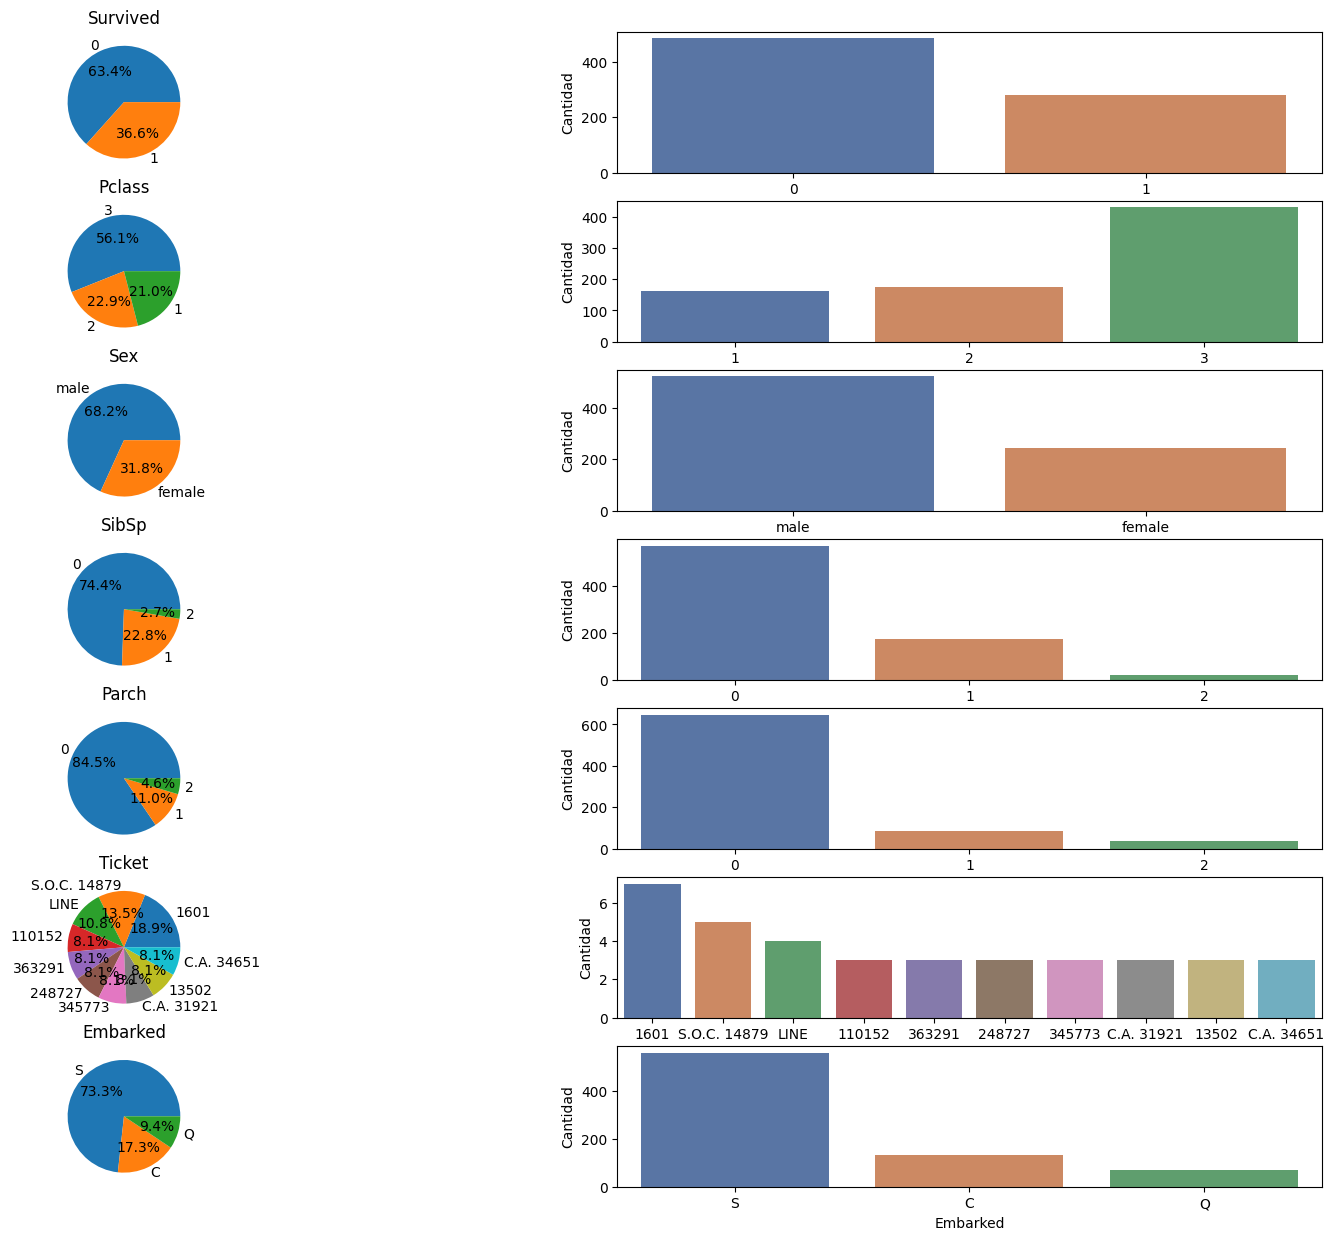

In [19]:
Analisis_Categorico(data,categorico)


**Conclusion de la fase**

Como conclusion encotnramos los siguiente:

1. En la columna de survivor nos menciona que hay una tendnecia con un valor de **62%** de que no supervivientes
1. En la columna de Pclas nos menciona que el **56%** de los pasajeros totales eran de la clase 3
1. En la columna de Sex nos menciona que **68%** de los pasajeros eran hombres
1. En la columna de SibSp y Parch nos menciona que **60%** de los psajeros iban solos donde el **73%** iban sin esposa o hermanos y **83%** iban sin familiares o hijos
1. En la columna de ticket nos menciona que el ticket mas vendido fue el de __1601__ con una venta total de **19%** de todos los pasajeros
1. En la columna de Embarked nos menciona que **73%** de los pasajeros embarcaron en el puerto __S__

### Analisis de datos nominales
***

In [20]:
nominal


['Age', 'Fare']

In [21]:
g=data.groupby('Age')['Fare'].count().reset_index()
# sns.scatterplot(x=g['Age'],y=g['Fare'])
g[g['Age'] == round(g.mean()['Age'])]/g['Fare'].sum()


,Age,Fare
43,0.046936,0.023468


C:\Users\Carlos\AppData\Local\Temp\ipykernel_29312\919918847.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(moda))
C:\Users\Carlos\AppData\Local\Temp\ipykernel_29312\919918847.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=grupo_datos[lista_nominal[x]],ax=ax[x])
C:\Users\Carlos\AppData\Local\Temp\ipykernel_29312\919918847.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax[x].axvline(float(moda),color='y',linestyle='--')
C

29
8


c:\Users\Carlos\Desktop\Unad\Semestre 7\ANÁLISIS DE DATOS\analisis\Anexo 6 - Dataset Titanic\enviroment\lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


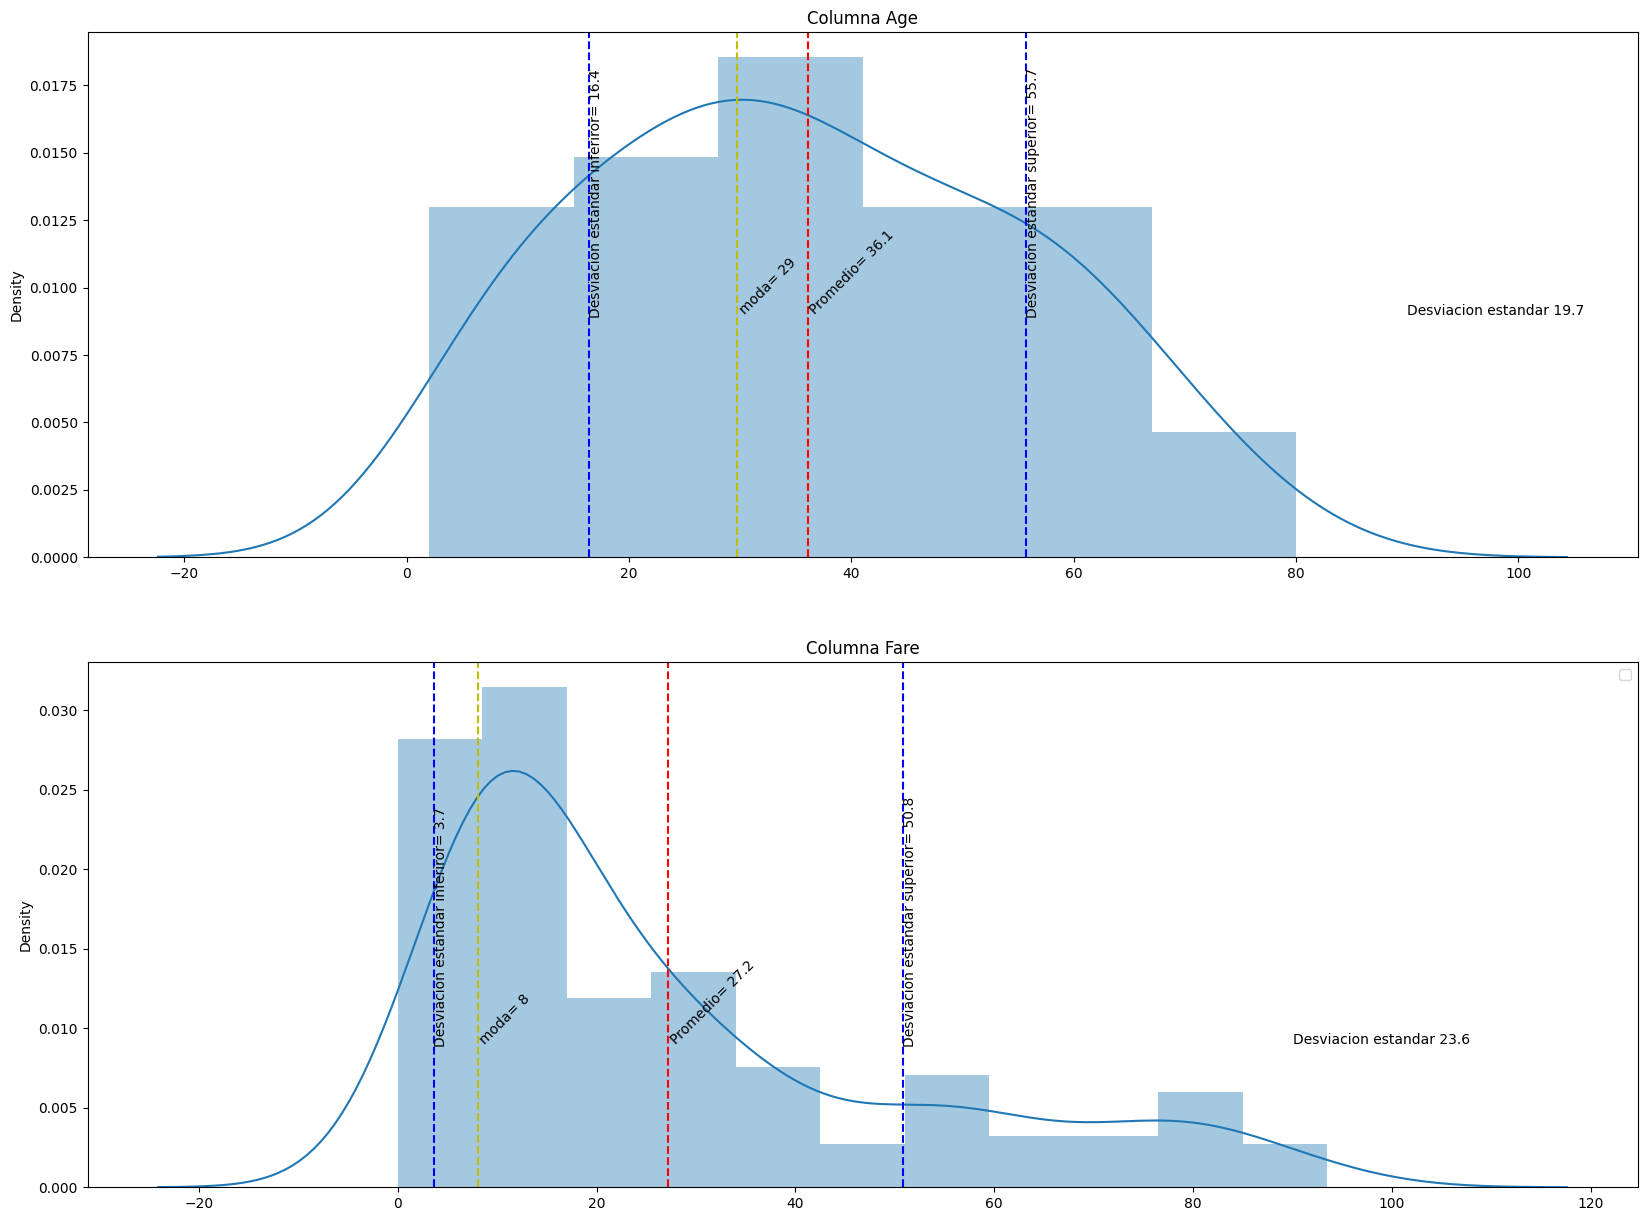

In [22]:
def Analisis_nominal(dt,lista_nominal):
    f,ax = plt.subplots(len(lista_nominal),1,figsize=(20,15))

    for x in range(len(lista_nominal)):
        #Grupo de datos
        grupo_datos = dt.groupby(lista_nominal[x])['Sex'].count().reset_index()
        grupo_datos = grupo_datos.rename(columns={'Sex':'Cantidad'})

        #grafica de dispersion
        # sns.scatterplot(x=grupo_datos[lista_nominal[x]],y=grupo_datos['Cantidad'],ax=ax[x,0])
        media = grupo_datos[lista_nominal[x]].mean()
        std = grupo_datos[lista_nominal[x]].std()
        moda = dt[lista_nominal[x]].mode()
        print(int(moda))

        sns.distplot(x=grupo_datos[lista_nominal[x]],ax=ax[x])


        ax[x].axvline(media,color='r',linestyle='--')
        ax[x].axvline(media+std,color='b',linestyle='--')
        ax[x].axvline(media-std,color='b',linestyle='--')
        ax[x].axvline(float(moda),color='y',linestyle='--')



        #extraccion de informacion
        ax[x].text(media, 0.009, f'Promedio= {media:.1f}', rotation=45, color='black')
        ax[x].text(moda, 0.009, f'moda= {int(moda)}', rotation=45, color='black')
        ax[x].text(90, 0.009, f'Desviacion estandar {std:.1f}', rotation=0, color='black')
        ax[x].text(media+std, 0.009, f'Desviacion estandar superior= {media+std:.1f}', rotation=90, color='black')
        ax[x].text(media-std, 0.009, f'Desviacion estandar inferiror= {media-std:.1f}', rotation=90, color='black')



        ax[x].set_title(f"Columna {lista_nominal[x]}")
        plt.legend()


Analisis_nominal(data,nominal)


**Conclusion del analisis**

Como conclusion del analisis y corroborando lo expuesto por el analisis de atipicos usando la asimetria, encontramos que; por un lado en ambas tablas el promedio es superior a la moda, entiendase que una simetria perfecta es cuando el promedio y la moda son iguales, cuando la moda es superior al promedio hablamos de una asimetria con atipicos negativos, y en el caso contrario es lo que suecede en la grafica es decir, que hay atipicos superiores a la moda.

Otro factor interesante el es de la desviacion estandar; la desviacion estandar es la variabilidad que tiene los datos con respecto al promedio, esta variabilidad puede ser o bien superior al promedio o bien bajo al promedio, entre mas cerca esta la desviacion estandar del promedio mas menos variabilidad habra, por ende la desviacion sera menor.

**¿Y para que sirve este analisis?**

Teniendo en cuenta estas definiciones, encontramos que por la desviacion estandar los datos pueden llegar a tener una relacion, no obstante podriaos decir que esta relacion no es direacta, dado que en ambas figuras hay una alta variabilidad; por otro lado y corroborando la idea anterior el que la moda y el promedio no sean iguales puede inferir a que no haya una relacion directa.

## Relacion Multivariable
*****
Ahora antes de la creacion del modelo, buscaremos aquellas tablas que tengan una mayor relacion con la columna de nuestro interes _Survived_ esto con el fin de que nuestro modelo tenga un mejor rendimiento y por ende mejores respuestas.



Relacion entre la columna Survived y la columna Age
----------------------------------------------------------------
Tamaño de la muestra: 759


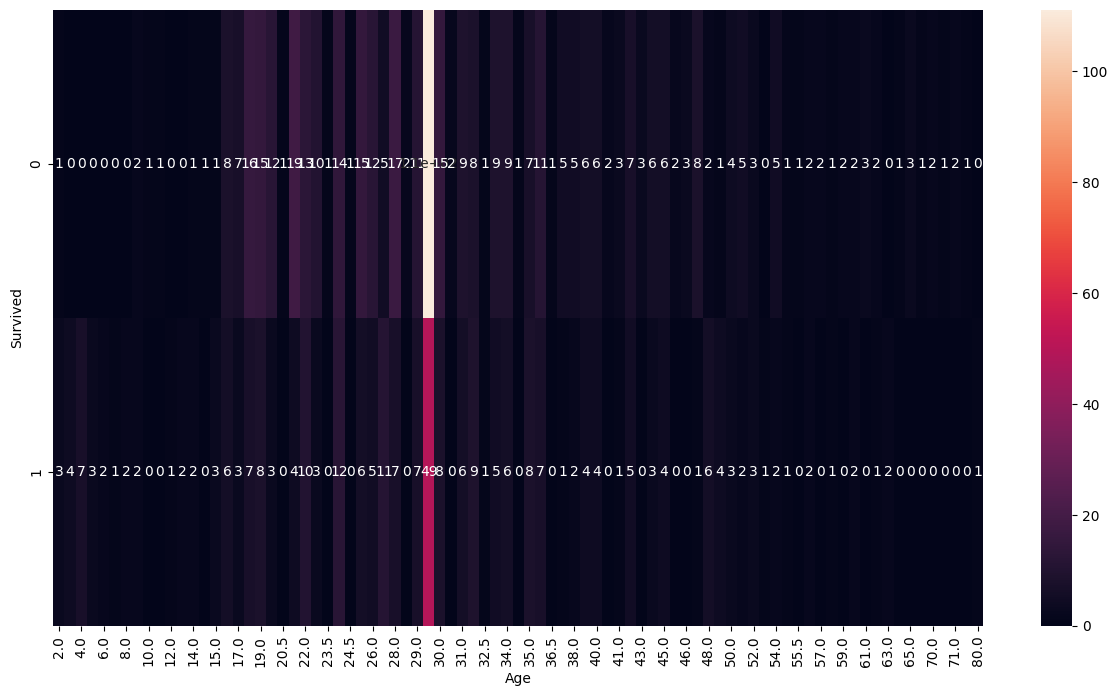

 Valor de la relacion:39%



Relacion entre la columna Survived y la columna Fare
----------------------------------------------------------------
Tamaño de la muestra: 759


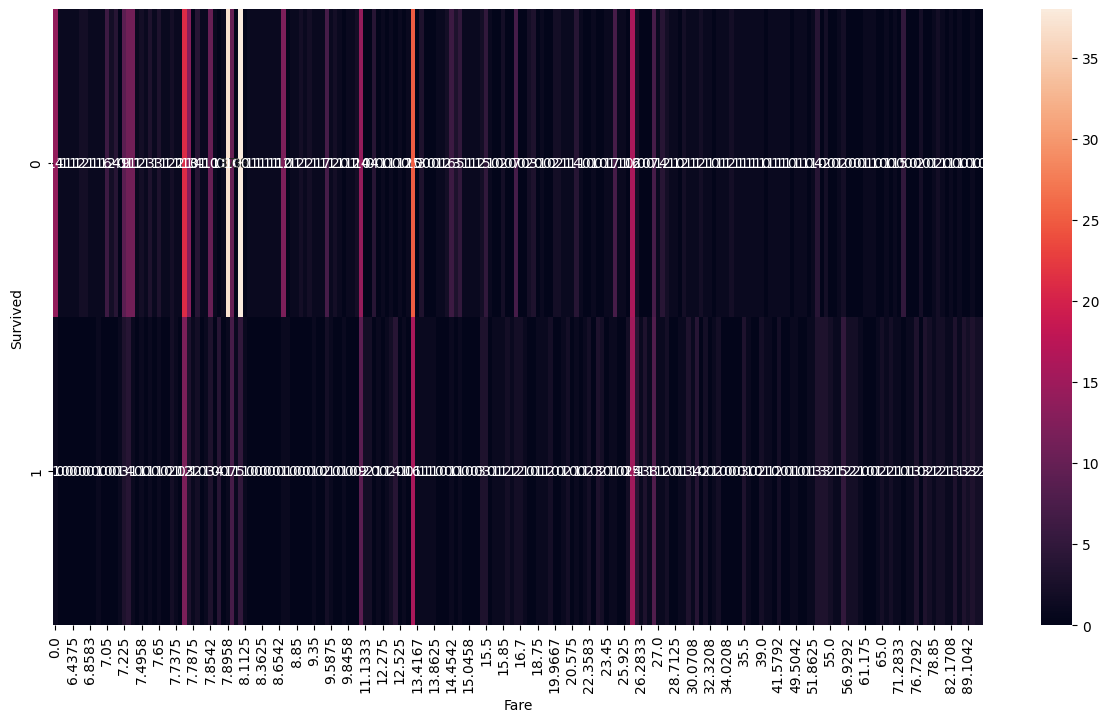

 Valor de la relacion:66%





In [23]:
relacion_nominal ={}
for col in nominal:
    relacion=Relacion_Categorico_categorico(data,'Survived',col,0.99)
    relacion_nominal.setdefault(col,relacion)
    print("\n\n")


Relacion entre la columna Survived y la columna Pclass
----------------------------------------------------------------
Tamaño de la muestra: 759


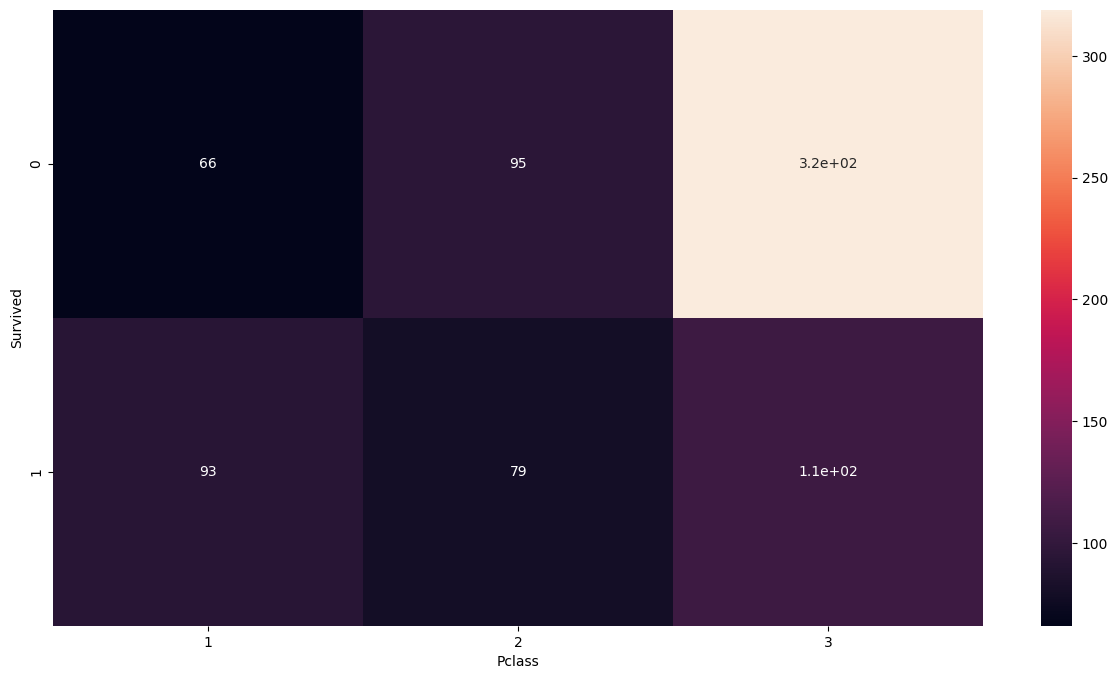

 Valor de la relacion:29%



Relacion entre la columna Survived y la columna Sex
----------------------------------------------------------------
Tamaño de la muestra: 759


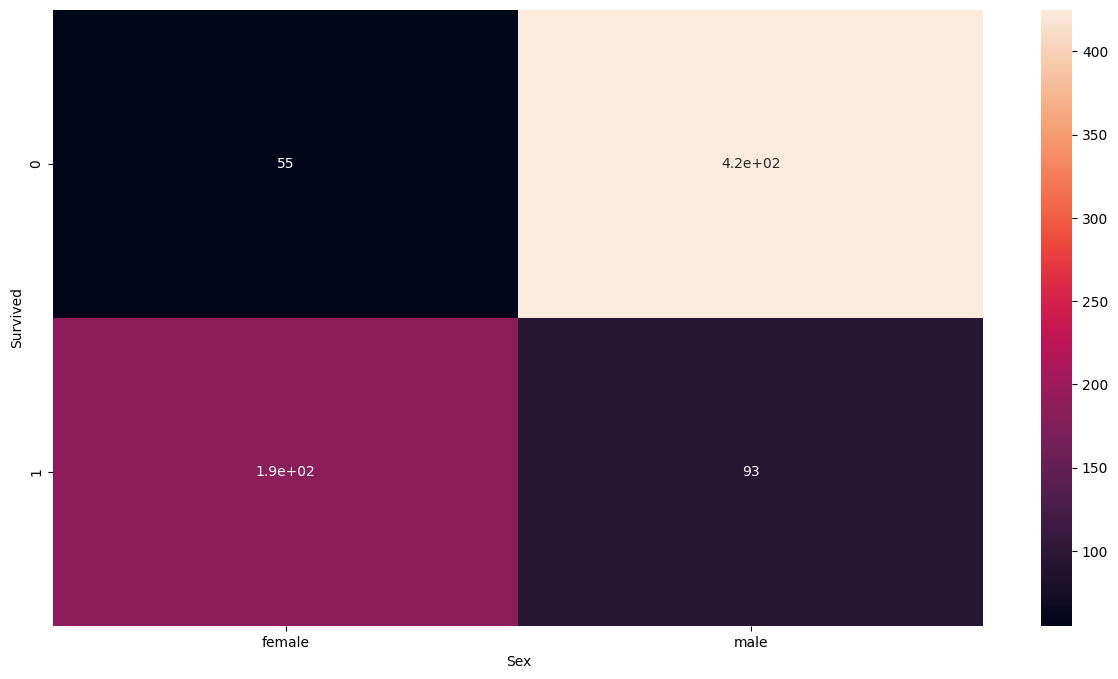

 Valor de la relacion:57%



Relacion entre la columna Survived y la columna SibSp
----------------------------------------------------------------
Tamaño de la muestra: 759


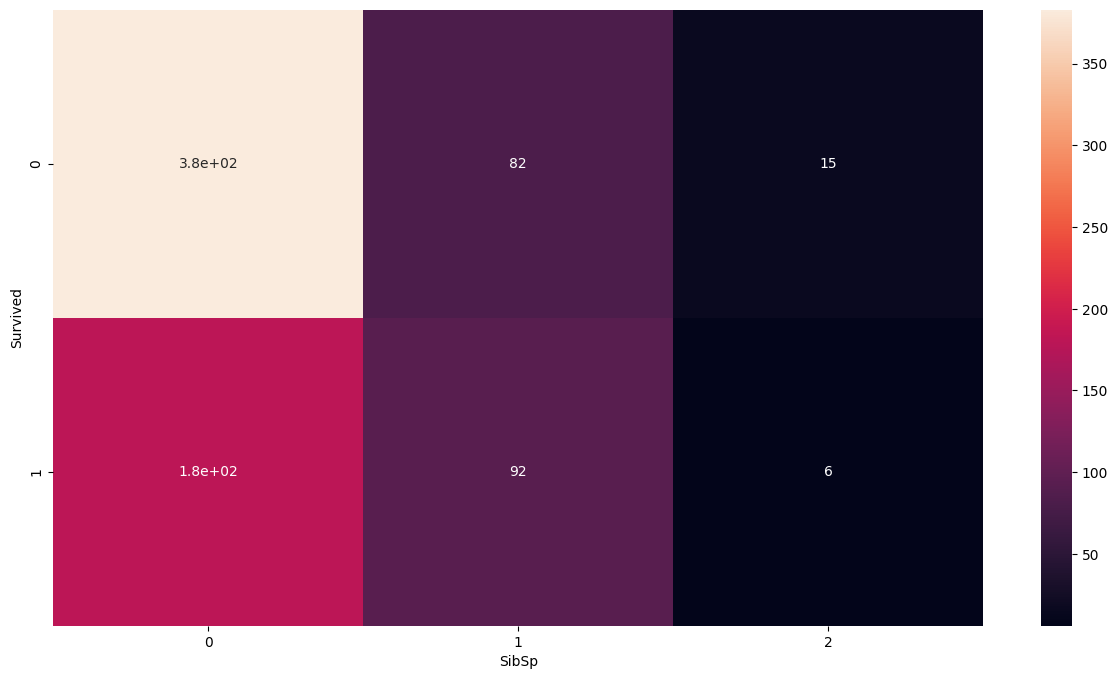

 Valor de la relacion:18%



Relacion entre la columna Survived y la columna Parch
----------------------------------------------------------------
Tamaño de la muestra: 759


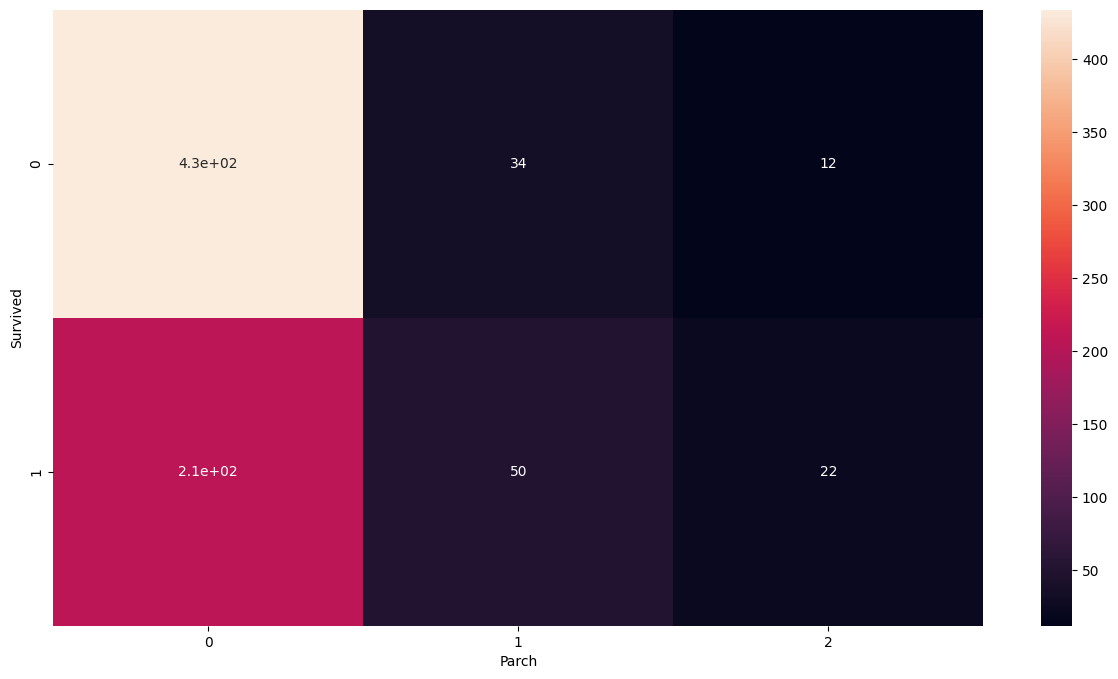

 Valor de la relacion:22%



Relacion entre la columna Survived y la columna Ticket
----------------------------------------------------------------
Tamaño de la muestra: 759


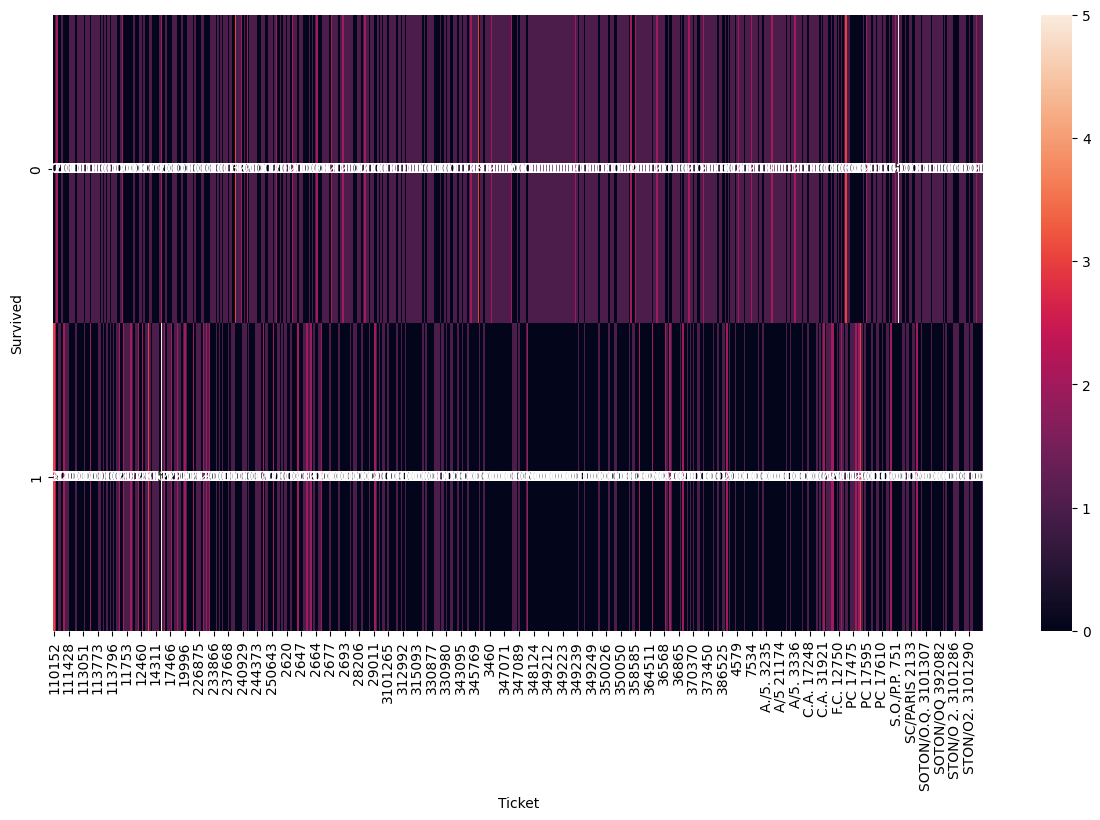

No existe relacion



Relacion entre la columna Survived y la columna Embarked
----------------------------------------------------------------
Tamaño de la muestra: 759


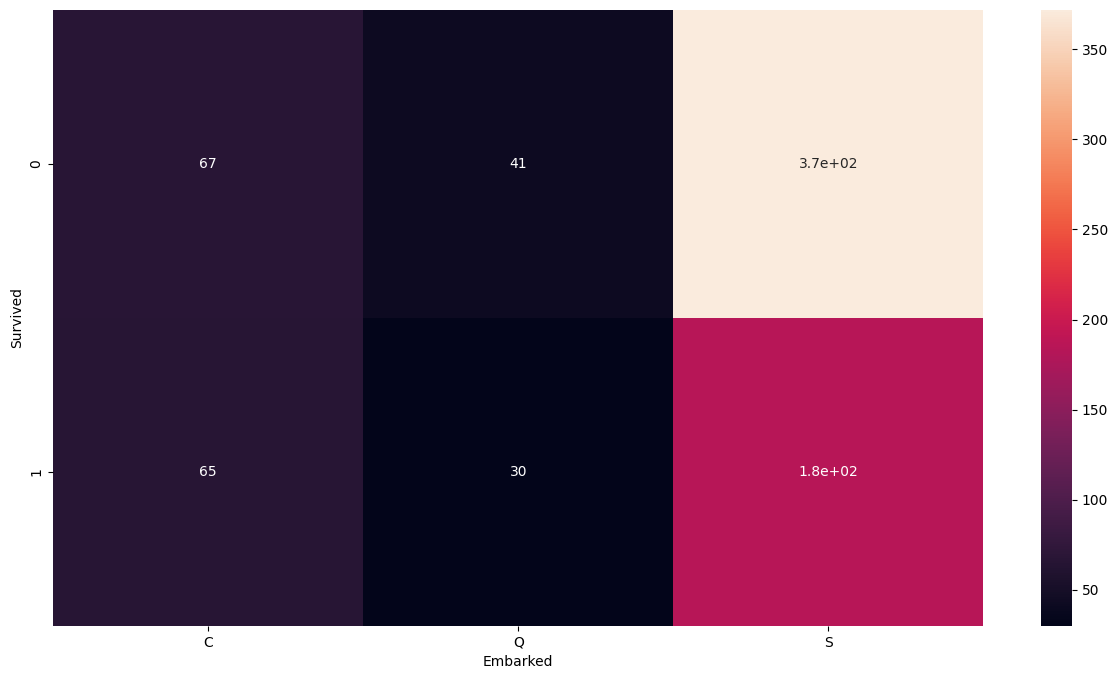

 Valor de la relacion:13%





In [24]:
relacion_categorica = {}
for col in categorico:
    try:
        relacion=Relacion_Categorico_categorico(data,'Survived',col,0.99)
        print("\n\n")
        relacion_categorica.setdefault(col,relacion)

    except:pass


In [25]:
relacion_nominal


{'Age': 0.3884104451012054, 'Fare': 0.662994207564273}

In [26]:
relacion_categorica


{'Pclass': 0.28748251577120415,
 'Sex': 0.5688778581513684,
 'SibSp': 0.18266896710451216,
 'Parch': 0.21671893131621092,
 'Ticket': None,
 'Embarked': 0.1307937548787671}

**Conclusion de la fase**

Como conclusion de esta seccion encontramos que la unica columna  que noiene una relacion es la de _Ticket_ por ende la eliminaremos, posterior a ello empezaremos con la division y preparacion de los datos en **x_data** donde guardaremos las tablas con relacion y **y_data** donde guardaremos la columna de nuestro interes.


### Extraccion de columnas de interes y division de datos
*****
Ahora aplicaremos la evaluacion de la seccion anterior y dividiremos los datos para el entrenamiento de nuestro modelo

In [84]:
#convertirlo en dataset 
Columnas_interes = pd.DataFrame([ [k,v] for k,v in relacion_categorica.items()],columns=['Columna','Relacion'])
Columnas_interes = pd.concat([Columnas_interes,pd.DataFrame([ [k,v] for k,v in relacion_nominal.items()],columns=['Columna','Relacion'])])


In [89]:
Columnas_interes=Columnas_interes.dropna()
Columnas_interes


,Columna,Relacion
0,Pclass,0.287483
1,Sex,0.568878
2,SibSp,0.182669
3,Parch,0.216719
5,Embarked,0.130794
0,Age,0.388410
1,Fare,0.662994


**Division de los datos**
*****

In [90]:
from sklearn.model_selection import train_test_split

#Division en columna objetivo y columnas de interes
y_data = data['Survived']
x_data = data[Columnas_interes['Columna']]
str_columns = data[Columnas_interes['Columna']].select_dtypes(include=['object']).columns # Columnas categoricas que son texto


# Division de los datos
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data)


## Creacion del modelo
****
Por ultimo, pero mas importante la creacion del modelo predictivo, el cual sera un modelo de **Regresion logistica** con el fin de determinar si una persona sobrevivio o no al accidente.

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score


In [93]:
#Creacion del modelo
preprosecing = ColumnTransformer(transformers=[('encoding',OneHotEncoder(),str_columns)],remainder='passthrough')
regresion_logistica = LogisticRegression()

regresion_logistica = Pipeline(steps=[('preprocesar',preprosecing),('Estandarizar',StandardScaler()),('Regresion',regresion_logistica)])

#entrenamiento del modelo
regresion_logistica.fit(x_train,y_train)

#Evaluacion del modelo
y_pred = regresion_logistica.predict(x_test)

acc=accuracy_score(y_test,y_pred)


Nivel de certeza: 82%


In [94]:
print(f"Nivel de certeza: {round(acc*100 )}%")


Nivel de certeza: 82%


In [96]:
regresion_logistica


Pipeline(steps=[('preprocesar',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoding', OneHotEncoder(),
                                                  Index(['Sex', 'Embarked'], dtype='object'))])),
                ('Estandarizar', StandardScaler()),
                ('Regresion', LogisticRegression())])

### Mostrar resultado del Modelo
****

In [97]:
x_test


,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
495,3,male,0,0,C,29.709916,14.4583
370,1,male,1,0,C,25.000000,55.4417
488,3,male,0,0,S,30.000000,8.0500
711,1,male,0,0,S,29.709916,26.5500
500,3,male,0,0,S,17.000000,8.6625
...,...,...,...,...,...,...,...
212,3,male,0,0,S,22.000000,7.2500
214,3,male,1,0,Q,29.709916,7.7500
43,2,female,1,2,C,3.000000,41.5792
403,3,male,1,0,S,28.000000,15.8500


Text(0.5, 1.0, 'Valor Real')

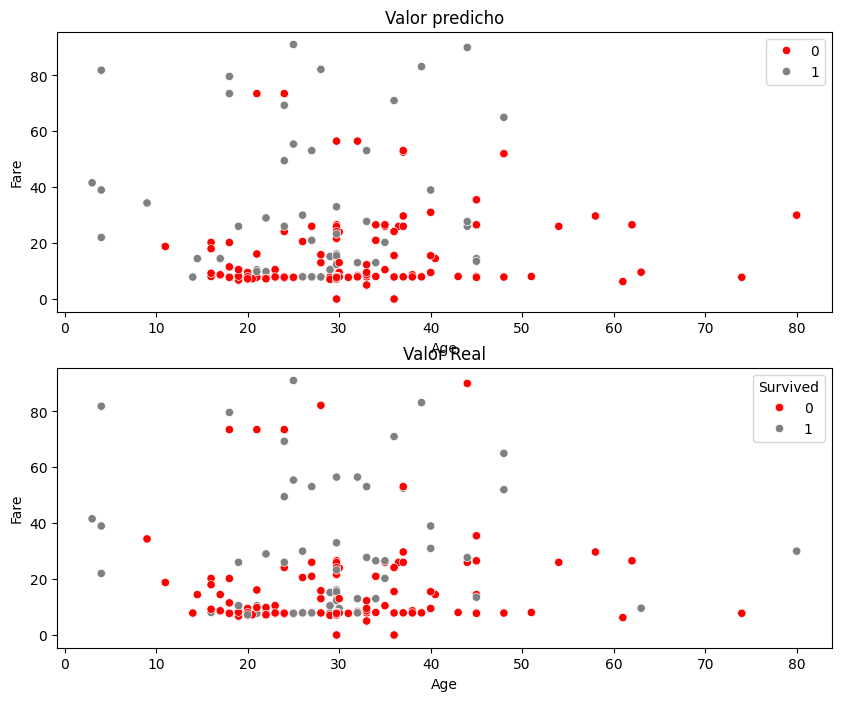

In [109]:
f,ax = plt.subplots(2,1,figsize=(10,8))

#Modelo prediccion 
sns.scatterplot(data=x_test,x='Age',y='Fare',hue=y_pred,palette=['red','gray'],ax=ax[0])
ax[0].set_title('Valor predicho')
#modelo real
sns.scatterplot(data=x_test,x='Age',y='Fare',hue=y_test,palette=['red','gray'],ax=ax[1])
ax[1].set_title('Valor Real')


